In [27]:
import pandas as pd
import numpy as np
                    #importing data
url= "https://assets.datacamp.com/production/repositories/654/datasets/92b75b9bc0c0a8a30999d76f4a1ee786ef072a9c/titanic_all_numeric.csv"
df= pd.read_csv(url)
df.dropna()
df.head(3)

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1


In [32]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

## this is my target variable 
target_var= to_categorical(df["survived"])

###features
feature_var= df.drop("survived", axis=1).values


In [33]:
shape= feature_var.shape[1]
   ##creating the model###
model_1=Sequential()

model_1.add(Dense(50, activation='relu', input_shape=(shape,), name='layer_from_input'))
model_1.add(Dense(50, activation='relu', name='2nd_layer'))
model_1.add(Dense(50, activation='relu', name='3nd_layer'))

###output layer, it has 2 nodes because classification gives two output: 0 and 1##
model_1.add(Dense(2, activation='softmax', name='output_layer'))


#compiling the model using adam optimizer
model_1.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

model_1.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_from_input (Dense)     (None, 50)                550       
_________________________________________________________________
2nd_layer (Dense)            (None, 50)                2550      
_________________________________________________________________
3nd_layer (Dense)            (None, 50)                2550      
_________________________________________________________________
output_layer (Dense)         (None, 2)                 102       
Total params: 5,752.0
Trainable params: 5,752
Non-trainable params: 0.0
_________________________________________________________________


In [34]:
## using earlystopping callback so that execution stops if accuracy value does not improve within 2 run
from keras.callbacks import EarlyStopping
early_monitor = EarlyStopping(patience=2)


#training and testing the model (80% training, 20% testing)

training= model_1.fit(feature_var,target_var, epochs=30, validation_split=0.2, callbacks=[early_monitor])






Train on 712 samples, validate on 179 samples
Epoch 1/30
712/712 [==============================] - 0s - loss: 0.9670 - acc: 0.6236 - val_loss: 0.5339 - val_acc: 0.7207
Epoch 2/30
712/712 [==============================] - 0s - loss: 0.6600 - acc: 0.6728 - val_loss: 0.5249 - val_acc: 0.7374
Epoch 3/30
712/712 [==============================] - 0s - loss: 0.6112 - acc: 0.6840 - val_loss: 0.5214 - val_acc: 0.7598
Epoch 4/30
712/712 [==============================] - 0s - loss: 0.5911 - acc: 0.6854 - val_loss: 0.5201 - val_acc: 0.7318
Epoch 5/30
712/712 [==============================] - 0s - loss: 0.5799 - acc: 0.6910 - val_loss: 0.5919 - val_acc: 0.7430
Epoch 6/30
712/712 [==============================] - 0s - loss: 0.5844 - acc: 0.6952 - val_loss: 0.4926 - val_acc: 0.7654
Epoch 7/30
712/712 [==============================] - 0s - loss: 0.5655 - acc: 0.7149 - val_loss: 0.4892 - val_acc: 0.7933
Epoch 8/30
712/712 [==============================] - 0s - loss: 0.6035 - acc: 0.7289 - val_l

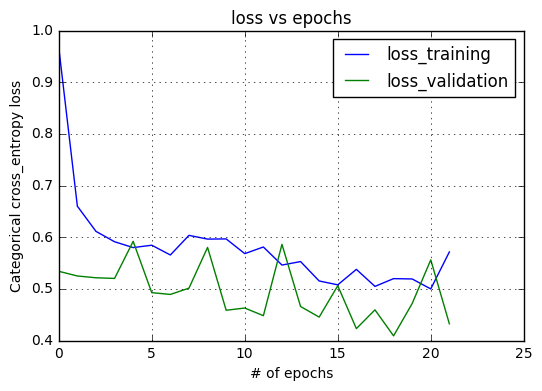

In [35]:
import matplotlib.pyplot as plt
plt.plot(training.history["loss"])
plt.plot(training.history["val_loss"])
plt.legend(['loss_training', 'loss_validation'])
plt.xlabel("# of epochs")
plt.ylabel("Categorical cross_entropy loss")
plt.title("loss vs epochs")
plt.grid()
plt.show()

# since there is no more improvement in the val_loss in next 3 epochs afer val_loss=0.4090, the code stopped. 
#This model's validation accuracy is 83.8% and val_loss is 0.4323





In [39]:
## creating another model by adding another layer
   ##creating the model_2###
model2=Sequential()

model2.add(Dense(50, activation='relu', input_shape=(shape,), name='layer_from_input'))
model2.add(Dense(50, activation='relu', name='2nd_layer'))
model2.add(Dense(50, activation='relu', name='3nd_layer'))
model2.add(Dense(50, activation='relu', name='4th_layer'))

###output layer, it has 2 nodes because classification gives two output: 0 and 1##
model2.add(Dense(2, activation='softmax', name='output_layer'))


#compiling the model using adam optimizer
model2.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_from_input (Dense)     (None, 50)                550       
_________________________________________________________________
2nd_layer (Dense)            (None, 50)                2550      
_________________________________________________________________
3nd_layer (Dense)            (None, 50)                2550      
_________________________________________________________________
4th_layer (Dense)            (None, 50)                2550      
_________________________________________________________________
output_layer (Dense)         (None, 2)                 102       
Total params: 8,302.0
Trainable params: 8,302
Non-trainable params: 0.0
_________________________________________________________________


In [40]:
from keras.callbacks import EarlyStopping
early_monitor = EarlyStopping(patience=2)


#training and testing the model (80% training, 20% testing)

training_2= model2.fit(feature_var,target_var, epochs=30, validation_split=0.2, callbacks=[early_monitor])

Train on 712 samples, validate on 179 samples
Epoch 1/30
712/712 [==============================] - 0s - loss: 0.8961 - acc: 0.6025 - val_loss: 0.5417 - val_acc: 0.7263
Epoch 2/30
712/712 [==============================] - 0s - loss: 0.6354 - acc: 0.6826 - val_loss: 0.5207 - val_acc: 0.7318
Epoch 3/30
712/712 [==============================] - 0s - loss: 0.6026 - acc: 0.6770 - val_loss: 0.5134 - val_acc: 0.7821
Epoch 4/30
712/712 [==============================] - 0s - loss: 0.6065 - acc: 0.6938 - val_loss: 0.5378 - val_acc: 0.7654
Epoch 5/30
712/712 [==============================] - 0s - loss: 0.6439 - acc: 0.6742 - val_loss: 0.5374 - val_acc: 0.7207
Epoch 6/30
712/712 [==============================] - 0s - loss: 0.5859 - acc: 0.6826 - val_loss: 0.4863 - val_acc: 0.7765
Epoch 7/30
712/712 [==============================] - 0s - loss: 0.5839 - acc: 0.6910 - val_loss: 0.4952 - val_acc: 0.7933
Epoch 8/30
712/712 [==============================] - 0s - loss: 0.5661 - acc: 0.7191 - val_l

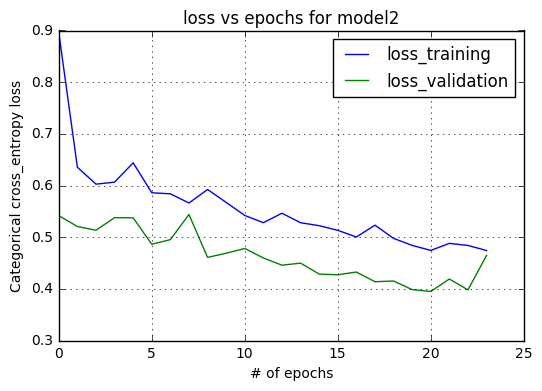

In [41]:
import matplotlib.pyplot as plt
plt.plot(training_2.history["loss"])
plt.plot(training_2.history["val_loss"])
plt.legend(['loss_training', 'loss_validation'])
plt.xlabel("# of epochs")
plt.ylabel("Categorical cross_entropy loss")
plt.title("loss vs epochs for model2")
plt.grid()
plt.show()

# since there is no more improvement in the val_loss in next 3 epochs afer val_loss=0.3949, the code stopped. 
#This model's validation accuracy is 78.77% and val_loss is 0.4646


In [42]:
## creating another model by removing one layer but adding more nodes(or neurons)
   ##creating the model###
model_3=Sequential()

model_3.add(Dense(150, activation='relu', input_shape=(shape,), name='layer_from_input'))
model_3.add(Dense(150, activation='relu', name='2nd_layer'))
model_3.add(Dense(150, activation='relu', name='3nd_layer'))

###output layer, it has 2 nodes because classification gives two output: 0 and 1##
model_3.add(Dense(2, activation='softmax', name='output_layer'))


#compiling the model using adam optimizer
model_3.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

model_3.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_from_input (Dense)     (None, 150)               1650      
_________________________________________________________________
2nd_layer (Dense)            (None, 150)               22650     
_________________________________________________________________
3nd_layer (Dense)            (None, 150)               22650     
_________________________________________________________________
output_layer (Dense)         (None, 2)                 302       
Total params: 47,252.0
Trainable params: 47,252
Non-trainable params: 0.0
_________________________________________________________________


In [43]:
from keras.callbacks import EarlyStopping
early_monitor = EarlyStopping(patience=2)


#training and testing the model (80% training, 20% testing)

training_3= model_3.fit(feature_var,target_var, epochs=30, validation_split=0.2, callbacks=[early_monitor])

Train on 712 samples, validate on 179 samples
Epoch 1/30
712/712 [==============================] - 0s - loss: 0.7828 - acc: 0.6278 - val_loss: 0.7471 - val_acc: 0.6425
Epoch 2/30
712/712 [==============================] - 0s - loss: 0.6644 - acc: 0.6615 - val_loss: 0.5431 - val_acc: 0.7318
Epoch 3/30
712/712 [==============================] - 0s - loss: 0.6752 - acc: 0.6334 - val_loss: 0.6215 - val_acc: 0.6480
Epoch 4/30
712/712 [==============================] - 0s - loss: 0.6576 - acc: 0.6756 - val_loss: 0.5236 - val_acc: 0.7318
Epoch 5/30
712/712 [==============================] - 0s - loss: 0.6457 - acc: 0.6587 - val_loss: 0.5139 - val_acc: 0.7263
Epoch 6/30
712/712 [==============================] - 0s - loss: 0.6087 - acc: 0.6728 - val_loss: 0.5062 - val_acc: 0.7486
Epoch 7/30
712/712 [==============================] - 0s - loss: 0.5841 - acc: 0.6952 - val_loss: 0.5293 - val_acc: 0.7207
Epoch 8/30
712/712 [==============================] - 0s - loss: 0.5996 - acc: 0.6882 - val_l

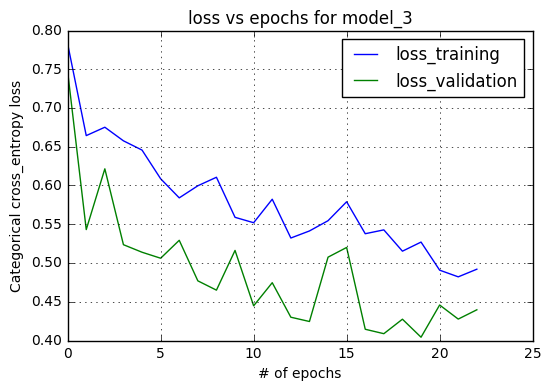

In [44]:
import matplotlib.pyplot as plt
plt.plot(training_3.history["loss"])
plt.plot(training_3.history["val_loss"])
plt.legend(['loss_training', 'loss_validation'])
plt.xlabel("# of epochs")
plt.ylabel("Categorical cross_entropy loss")
plt.title("loss vs epochs for model_3")
plt.grid()
plt.show()

# since there is no more improvement in the val_loss in next 3 epochs afer val_loss=0.4042, the code stopped. 
#This model's validation accuracy is 78.21% and val_loss is 0.4396

In [47]:
   ##creating the model###
model4=Sequential()

model4.add(Dense(150, activation='relu', input_shape=(shape,), name='layer_from_input'))
model4.add(Dense(100, activation='relu', name='2nd_layer'))
model4.add(Dense(100, activation='relu', name='3nd_layer'))

###output layer, it has 2 nodes because classification gives two output: 0 and 1##
model4.add(Dense(2, activation='softmax', name='output_layer'))


#compiling the model using adam optimizer
model4.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_from_input (Dense)     (None, 150)               1650      
_________________________________________________________________
2nd_layer (Dense)            (None, 100)               15100     
_________________________________________________________________
3nd_layer (Dense)            (None, 100)               10100     
_________________________________________________________________
output_layer (Dense)         (None, 2)                 202       
Total params: 27,052.0
Trainable params: 27,052
Non-trainable params: 0.0
_________________________________________________________________


In [48]:
from keras.callbacks import EarlyStopping
early_monitor = EarlyStopping(patience=2)


#training and testing the model (80% training, 20% testing)

training_4= model4.fit(feature_var,target_var, epochs=30, validation_split=0.2, callbacks=[early_monitor])

Train on 712 samples, validate on 179 samples
Epoch 1/30
712/712 [==============================] - 0s - loss: 0.9631 - acc: 0.5674 - val_loss: 0.5719 - val_acc: 0.7151
Epoch 2/30
712/712 [==============================] - 0s - loss: 0.7955 - acc: 0.6390 - val_loss: 0.6940 - val_acc: 0.6816
Epoch 3/30
712/712 [==============================] - 0s - loss: 0.7179 - acc: 0.6812 - val_loss: 0.5195 - val_acc: 0.7542
Epoch 4/30
712/712 [==============================] - 0s - loss: 0.6086 - acc: 0.6826 - val_loss: 0.5237 - val_acc: 0.7598
Epoch 5/30
712/712 [==============================] - 0s - loss: 0.7004 - acc: 0.6643 - val_loss: 0.7604 - val_acc: 0.4190
Epoch 6/30
712/712 [==============================] - 0s - loss: 0.6711 - acc: 0.6699 - val_loss: 0.4992 - val_acc: 0.7374
Epoch 7/30
712/712 [==============================] - 0s - loss: 0.5706 - acc: 0.7191 - val_loss: 0.4787 - val_acc: 0.7598
Epoch 8/30
712/712 [==============================] - 0s - loss: 0.5762 - acc: 0.6952 - val_l

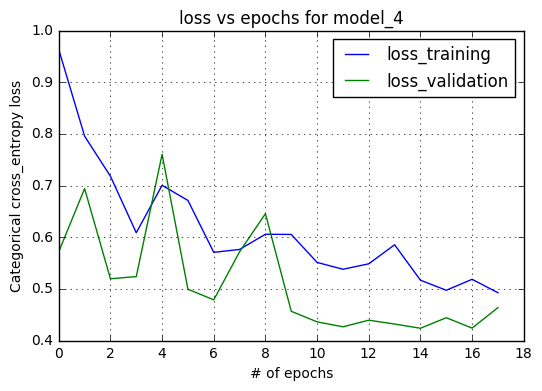

In [49]:
import matplotlib.pyplot as plt
plt.plot(training_4.history["loss"])
plt.plot(training_4.history["val_loss"])
plt.legend(['loss_training', 'loss_validation'])
plt.xlabel("# of epochs")
plt.ylabel("Categorical cross_entropy loss")
plt.title("loss vs epochs for model_4")
plt.grid()
plt.show()

# since there is no more improvement in the val_loss in next 3 epochs afer val_loss=0.4237, the code stopped. 
#This model's validation accuracy is 80.45% and val_loss is 0.4636

# Looking at the loss vs epochs curves, it looks like there are some overfitting issues in my model. The validation_accuracy varied from 78-83% which does not seem bad.

